<a href="https://colab.research.google.com/github/18520918/CS114.L11.KHCL/blob/master/Assignment%205/New_Headline_Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **News Headlines Sarcasm Detection**
> Dữ liệu bài toán được lấy từ https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection


In [ ]:
import pandas as pd
import numpy as np 
from google.colab import files
import io
uploaded = files.upload()

Saving Sarcasm_Headlines_Dataset.json to Sarcasm_Headlines_Dataset.json


In [ ]:
data = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset.json']),lines=True)

In [ ]:
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [ ]:
data = data.drop('article_link',axis=1)

In [ ]:
data

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


### **Tiền xử lí dữ liệu với thư viện nltk:**
1. Loại bỏ article_link trong DataFrame.
2. Duyệt qua tất cả các headline trong dataset hiện có, ta thực hiện loại bỏ tất cả các kí tự không phải là chữ cái.
3. Chuyển chuỗi bình luận thành các từ riêng biệt với hàm split().
4. Loại bỏ các từ không có nhiều ý nghĩa trong câu với thư viện PorterStemmer và chuyển các từ ngữ trong câu về dạng nguyên mẫu.
5. Ghép các từ trong một headline lại thành một câu thông thường và thêm vào trong một List.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

corpus =[]

for headline in data.values[:,0]:
  headline = re.sub('[^a-zA-Z]', ' ', headline)
  headline = headline.split()
  ps=PorterStemmer()
  headline = [ps.stem(word) for word in headline if word not in stopwords.words("english")]
  headline = " ".join(headline)
  corpus.append(headline)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
Y = data.iloc[:,1].values

### **Tiền xử lí với thư viện CountVectorizer().**
1. Với mỗi một headline trong corpus sẽ được đưa về dạng một vector.
2. Mỗi vector được đưa về dạng array.

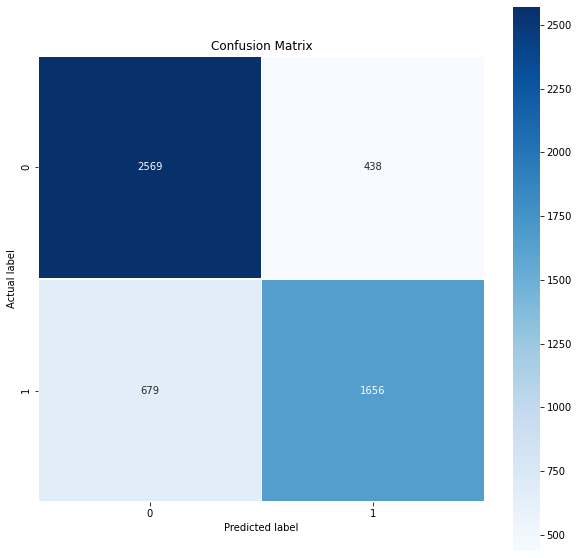

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=0)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
model = LogisticRegression().fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(X_test))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,fmt='.0f', linewidths = 0.5, square = True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(model.score(X_test,y_test))

0.7909022837888431


In [ ]:
print(X.shape[1])

16899


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=16000)
X = cv.fit_transform(corpus).toarray()
Y = data.iloc[:,1].values

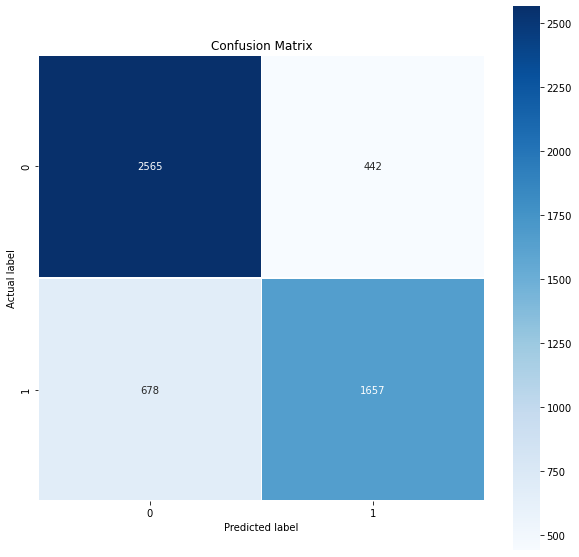

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=0)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
model = LogisticRegression().fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(X_test))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,fmt='.0f', linewidths = 0.5, square = True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(model.score(X_test,y_test))

0.7903406963684013
